<a href="https://colab.research.google.com/github/Wizardiem/Comision-61145-Data-Science-II/blob/main/Entrega_final_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introducción y descripción
El análisis del abandono de clientes en el sector bancario es fundamental para identificar patrones que permitan mejorar las estrategias de retención y, por ende, aumentar la rentabilidad. Este análisis está dirigido a ejecutivos de alto nivel que buscan comprender qué factores influyen en la decisión de un cliente de abandonar el banco.

https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction?resource=download


### Abstracto

**Motivación**: Este análisis está motivado por la necesidad de entender mejor los factores que contribuyen al [problema específico, como abandono de clientes, predicción de ventas, detección de fraudes, etc.]. La industria [específica, como banca, retail, manufactura] enfrenta actualmente desafíos en [describir brevemente el desafío, por ejemplo, retención de clientes, optimización de costos, mejora en la eficiencia]. A través de este análisis, se busca aplicar técnicas de Machine Learning para identificar patrones y realizar predicciones que puedan ayudar a abordar estas dificultades de manera proactiva.

**Audiencia**: Este análisis está dirigido a profesionales y ejecutivos en el sector de [industria específica, como marketing, finanzas, recursos humanos], especialmente aquellos interesados en la toma de decisiones basadas en datos. Además, puede ser útil para analistas y científicos de datos que trabajan en la aplicación de modelos predictivos en el negocio.

**Beneficios**: Los resultados de este análisis pueden beneficiar a la empresa o negocio al proporcionar una visión clara de los factores más relevantes para el [problema específico] y al permitir la creación de estrategias basadas en predicciones. La implementación de estos modelos puede contribuir a [mencionar resultados potenciales, como reducir costos, mejorar la retención de clientes, o incrementar la precisión en predicciones].



# Problema Comercial y Objetivos del Proyecto

## Problema Comercial
El abandono de clientes en el sector bancario representa una pérdida significativa en ingresos y una reducción en la base de clientes, lo cual impacta negativamente en la rentabilidad a largo plazo. Identificar los factores que llevan a los clientes a abandonar permitirá mejorar la estrategia de retención, minimizar las pérdidas y optimizar los recursos de marketing.

## Objetivos del Proyecto
1. **Reducir la Tasa de Abandono**: El principal objetivo es identificar los factores clave que influyen en el abandono de los clientes, con el fin de reducir esta tasa mediante acciones específicas.
2. **Segmentación de Clientes en Riesgo**: El proyecto busca también segmentar a los clientes en grupos según su probabilidad de abandono, permitiendo al equipo de retención enfocar sus esfuerzos en aquellos con mayor riesgo.
3. **Optimización de Estrategias de Marketing**: La comprensión profunda de las causas de abandono permitirá al equipo de marketing diseñar estrategias más efectivas y personalizadas para retener a los clientes y mejorar su experiencia.

Al cumplir estos objetivos, se espera no solo reducir la tasa de abandono, sino también mejorar la satisfacción y el compromiso de los clientes con el banco.



# Preguntas e Hipótesis de interés

Para guiar este análisis, se han formulado las siguientes peguntas:

1. ¿Qué factores influyen más en la decisión de un cliente de abandonar el banco?
2. ¿Existen diferencias significativas en la tasa de abandono entre diferentes países o géneros?
3. ¿La puntuación crediticia, la edad o la duración de la relación con el banco son predictores importantes del abandono?
4. ¿El hecho de tener una tarjeta de crédito o ser un miembro activo reduce la probabilidad de abandono?


In [1]:

# Configuración del formato de visualización de floats en Pandas
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
#Importacion de datos y vista previa

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Wizardiem/Comision-61145-Data-Science-II/main/Churn_Modelling.csv')

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.00,2,0.00,1,1.00,1.00,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.00,1,83807.86,1,0.00,1.00,112542.58,0
2,3,15619304,Onio,502,France,Female,42.00,8,159660.80,3,1.00,0.00,113931.57,1
3,4,15701354,Boni,699,France,Female,39.00,1,0.00,2,0.00,0.00,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.00,2,125510.82,1,NaN,1.00,79084.10,0


In [2]:
# Cuales son las dimensiones del dataset
df.shape

(10002, 14)

In [3]:
# Buscamos tener informacion sobre el dataset y cada una de sus columnas y que tipo de datos la componen.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


#Descripcion de Columnas

  Con el .info() podemos descubrir que contamos con 14 columnas de 10.002 filas y con el formato correspondiente, siendo la mayoria de ellos en Int64 o Float64, menos en los casos de Geography, Gender y Surname que son Objetct.

  A continuacion una breve descripcion de que significa cada columna para el mejor entendimiento del set de datos.

0.   RowNumber        Indice
1.   CustomerId       Un identificador único para cada cliente
2.   Surname          El apellido o apellido del cliente.
3.   CreditScore      Un valor numérico que representa la puntuación crediticia del cliente
4.   Geography        El país donde reside el cliente (Francia, España o Alemania)
5.   Gender           El género del cliente (masculino o femenino)
6.   Age              La edad del cliente
7.   Tenure           el número de años que el cliente ha estado en el banco.
8.   Balance          El saldo de la cuenta del cliente.
9.   NumOfProducts    La cantidad de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorros, tarjeta de crédito)
10.  HasCrCard        Si el cliente tiene una tarjeta de crédito (1 = sí, 0 = no)
11.  IsActiveMember   Si el cliente es un miembro activo (1 = sí, 0 = no)
12.  EstimatedSalary  El salario estimado del cliente
13.  Exited           Si el cliente se ha dado de baja (1 = sí, 0 = no)

Por otro lado, ya podemos notar que en los siguientes atributos tenemos campos nulos.

Geography        
Age           
HasCrCard        
IsActiveMember

In [4]:
#Vamos a contar cuantos datos null tenemos en cada columna.
df.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
# Realizamos la descripción estadística del dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.00,10002.00,10002.00,10001.00,10002.00,10002.00,10002.00,10001.00,10001.00,10002.00,10002.00
mean,5001.50,15690933.45,650.56,38.92,5.01,76491.11,1.53,0.71,0.51,100083.33,0.20
std,2887.47,71931.77,96.66,10.49,2.89,62393.47,0.58,0.46,0.50,57508.12,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2501.25,15628524.75,584.00,32.00,3.00,0.00,1.00,0.00,0.00,50983.75,0.00
50%,5001.50,15690732.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100185.24,0.00
75%,7501.75,15753225.50,718.00,44.00,7.00,127647.84,2.00,1.00,1.00,149383.65,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


# Limpieza y transformacion de datos

Segun la descripcion de columnas y los datos descriptos podemos tomar la decision de eliminar las columnas de RowNumber y CustomerId ya que para el analisis estadistico no estan aportando informacion.

In [6]:
# Eliminacion de las columnas mencionadas
df = df.drop(['RowNumber', 'CustomerId'], axis=1)
# Comprobamos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10002 non-null  object 
 1   CreditScore      10002 non-null  int64  
 2   Geography        10001 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10001 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10001 non-null  float64
 9   IsActiveMember   10001 non-null  float64
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 937.8+ KB


# Valores null  - Estrategias utilizadas


In [7]:
# Limpieza y Transformación de Datos

# Manejar valores nulos
 # En el caso de HasCrCard e IsActiveMember utilizo la moda ya que los valores permitodos son 0 y 1
df['HasCrCard'] = df['HasCrCard'].fillna(df['HasCrCard'].mode()[0])
df['IsActiveMember'] = df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0])

#Para la edad, lo primero que hacemos es como ver la represntación de los datos.
df['Age'].value_counts(normalize=1).mul(100)

,proportion
Age,
37.00,4.78
38.00,4.77
35.00,4.74
36.00,4.55
34.00,4.47
...,...
88.00,0.01
82.00,0.01
32.34,0.01


In [8]:
#Al ver que el valor mas represntativo no llega a un 5%, vamos a utilizar la mediana como metodo
df['Age'] = df['Age'].fillna(df['Age'].median())

#revisamos si nos queda algun valor null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10002 non-null  object 
 1   CreditScore      10002 non-null  int64  
 2   Geography        10001 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10002 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10002 non-null  float64
 9   IsActiveMember   10002 non-null  float64
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 937.8+ KB


In [9]:
#Para Geography, lo primero que hacemos es como ver la represntación de los datos.
df['Geography'].value_counts(normalize=1).mul(100)

,proportion
Geography,
France,50.13
Germany,25.10
Spain,24.77


In [10]:
#Podemos optar por utilizar la moda para completar los valores null de Geography.
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])

#revisamos si nos queda algun valor null
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10002 non-null  object 
 1   CreditScore      10002 non-null  int64  
 2   Geography        10002 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10002 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10002 non-null  float64
 9   IsActiveMember   10002 non-null  float64
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 937.8+ KB


In [11]:
# Revisamos las columnas con la codificacion de variables categoricas
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42.00,2,0.00,1,1.00,1.00,101348.88,1
1,Hill,608,Spain,Female,41.00,1,83807.86,1,0.00,1.00,112542.58,0
2,Onio,502,France,Female,42.00,8,159660.80,3,1.00,0.00,113931.57,1
3,Boni,699,France,Female,39.00,1,0.00,2,0.00,0.00,93826.63,0
4,Mitchell,850,Spain,Female,43.00,2,125510.82,1,1.00,1.00,79084.10,0


In [12]:
# Los siguientes atributos los pasamos a INT ya que solo permite 1 y 0

df['IsActiveMember'] = df['IsActiveMember'].astype('int')
df['HasCrCard'] = df['HasCrCard'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10002 non-null  object 
 1   CreditScore      10002 non-null  int64  
 2   Geography        10002 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10002 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10002 non-null  int64  
 9   IsActiveMember   10002 non-null  int64  
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 937.8+ KB


#Análisis Exploratorio de Datos (EDA)
El análisis univariado consiste en explorar cada variable de manera individual para entender su distribución y características.


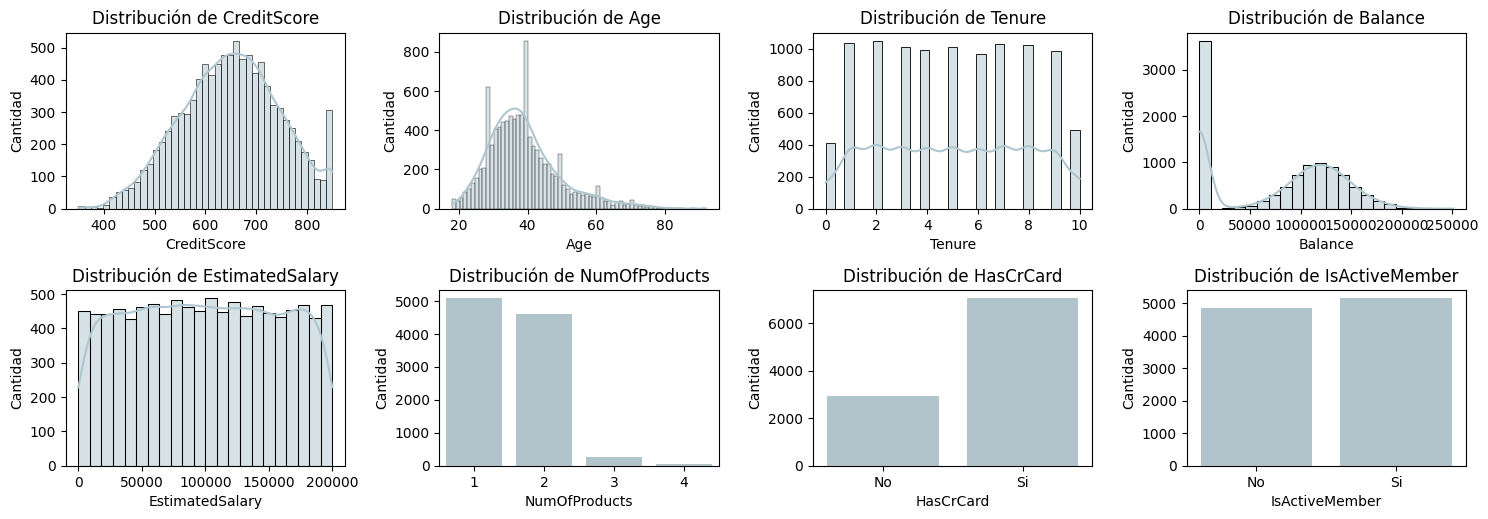

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas continuas
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
# Variables discretas
discrete_vars = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))

# Graficar las variables numéricas continuas
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[var], kde=True, color='#AEC6CF')
    plt.ylabel('Cantidad')
    plt.title(f'Distribución de {var}')

# Graficar las variables discretas
for i, var in enumerate(discrete_vars, len(continuous_vars)):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=var, data=df, color='#AEC6CF')
    plt.title(f'Distribución de {var}')
    plt.ylabel('Cantidad')
    if var in ['HasCrCard', 'IsActiveMember']:
        plt.xticks([0, 1], labels=['No', 'Si'])

plt.tight_layout()
plt.show()


#Conclusiones

Variables numericas

Luego de realizar un analisis univariado por cada atributo podemos determinar las siguientes conclusiones:

- CreditScore Un valor numérico que representa la puntuación crediticia del cliente - Tiene una distribucion asimetrica hacia la derecha, de todas maneras contine valores muy altos que pueden ser determinados outliers.
- Age La edad del cliente: Contamos con una distribucion asimetrica hacia la izquierda lo que indica que nuestros clientes son mayoritariamente personas de entre 35 a 45 años.
- Tenure El numero de años que el cliente ha estado en el banco. Se puede establecer que tenemos una distribucion igual en cada año.
- Balance El saldo de la cuenta del cliente. - Los datos muestran muchos valores en 0, lo cual por el contexto de datos lo podemos tomar como cierto y al mismo tiempo una simetria en los valores que si tienen valance.
- EstimatedSalary El salario estimado del cliente - Contamos con una representacion equitativa en lo que respecta al salario estimado.
- NumOfProducts La cantidad de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorros, tarjeta de crédito) - Los clientes cuentan maximo entre 1 y 2 productos.
- HasCrCard Si el cliente tiene una tarjeta de crédito (1 = sí, 0 = no)- la mayoria de los clientes tienen tarjeta de credito
- IsActiveMember Si el cliente es un miembro activo (1 = sí, 0 = no)- Existe una paridad con una leve ventaja a clientes activos.


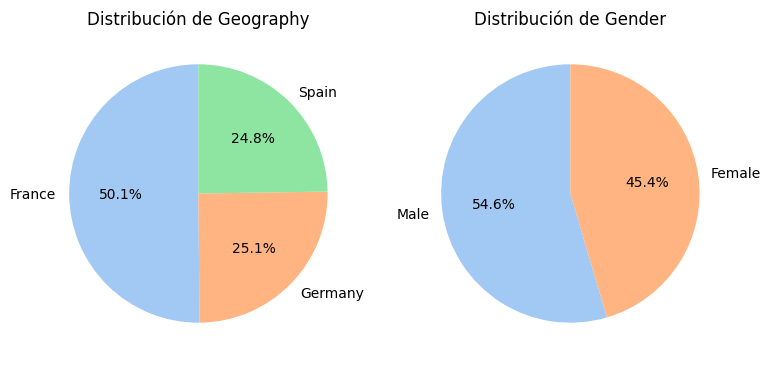

In [14]:
# Variables categóricas
cat_vars = ['Geography', 'Gender']

plt.figure(figsize=(15, 10))
for i, var in enumerate(cat_vars):
    plt.subplot(2, 4, i + 1)
    df[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f'Distribución de {var}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

Conclusiones variables Categoricas

- Geography El país donde reside el cliente (Francia, España o Alemania) - Vemos que casi todos nuestros clientes son de Francia y luego hay una paridad entre España y Alemania.
- Gender El género del cliente (masculino o femenino) - La mayor cantidad de nuestros clientes es masculino


# Análisis Exploratorio de Datos (EDA) - MULTIVARIADO

Comenzaremos a realizar un analisis mutivariado con foco en la variable Exited, la cual es la que nos dice si el cliente abandono el banco o no.

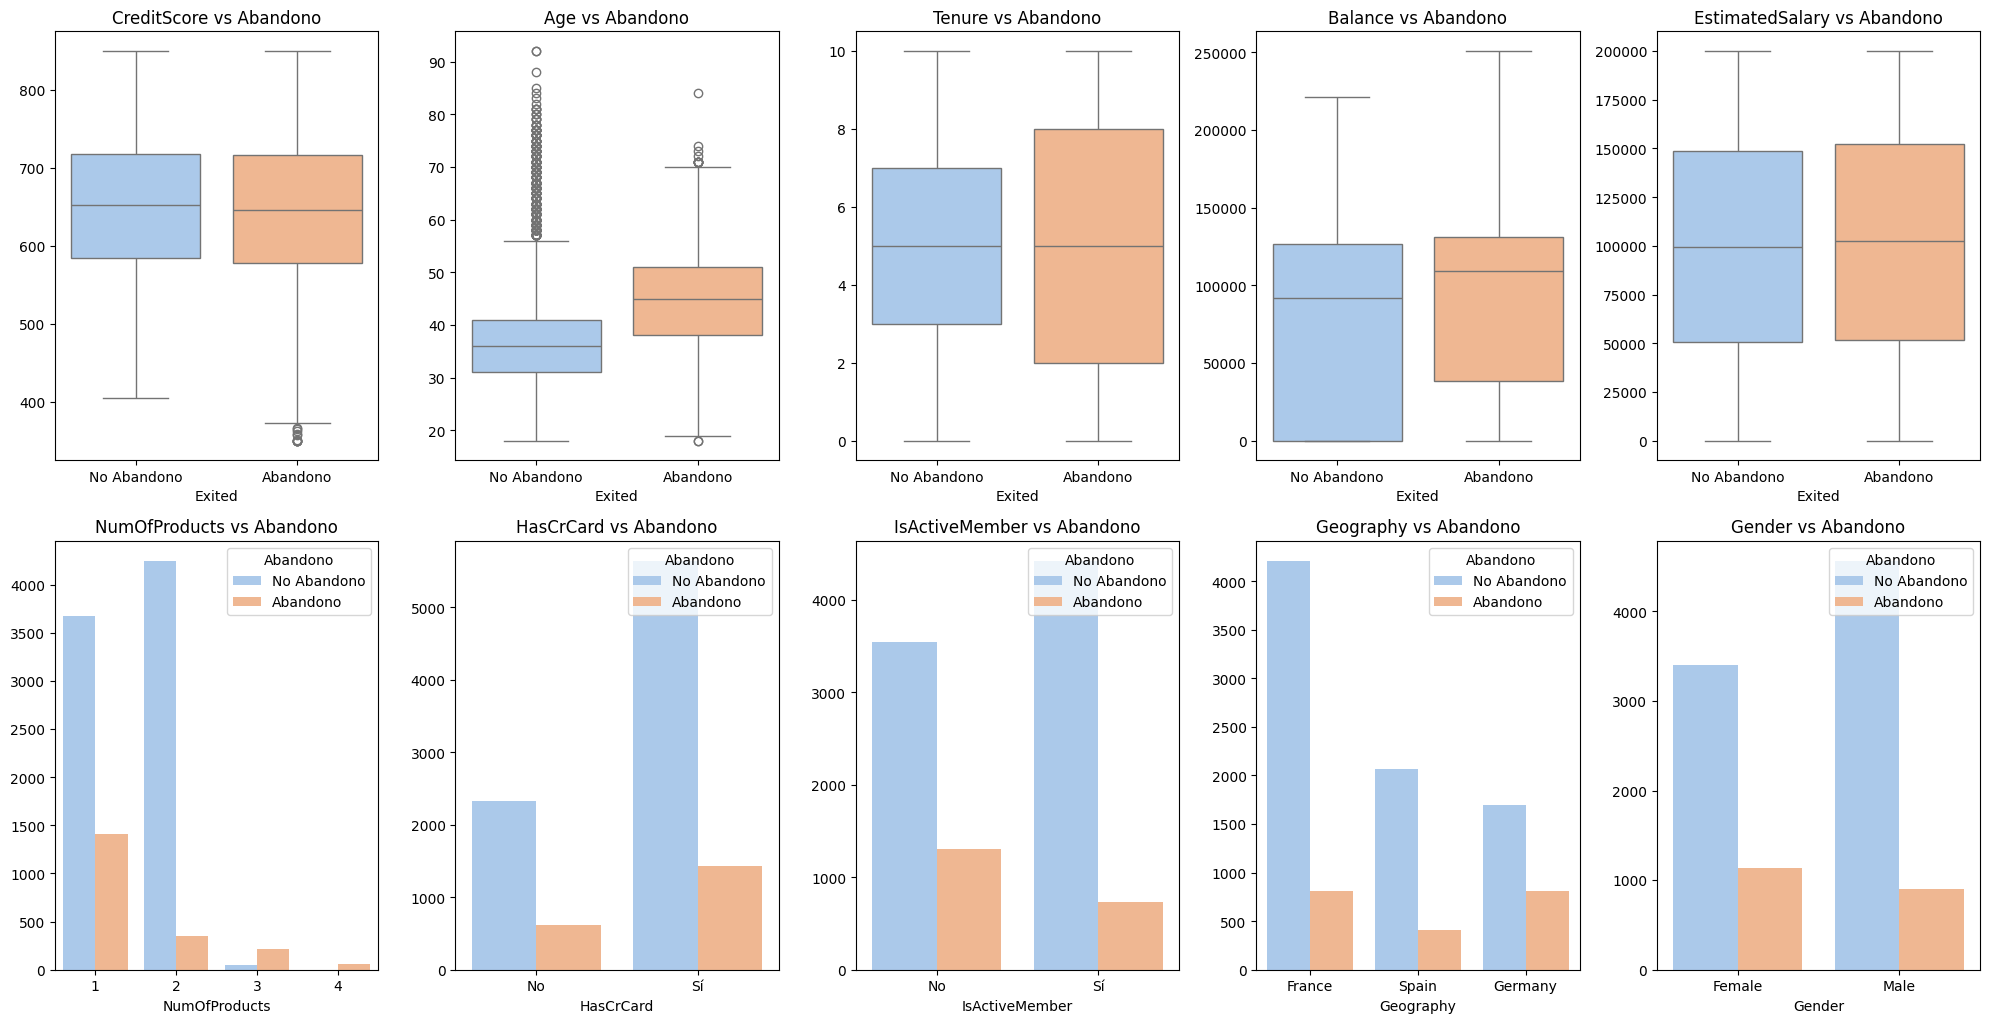

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
discrete_vars = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']
cat_vars = ['Geography', 'Gender']

plt.figure(figsize=(20, 15))

# Variables continuas vs Exited
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 5, i + 1)  # Cambiar a 3 filas y 5 columnas para acomodar más gráficos
    sns.boxplot(x='Exited', y=var, data=df, hue='Exited', palette='pastel')
    plt.title(f'{var} vs Abandono')
    plt.ylabel('')
    plt.xticks([0, 1], labels=['No Abandono', 'Abandono'])
    plt.legend([],[], frameon=False)

# Variables discretas vs Exited
for i, var in enumerate(discrete_vars):
    plt.subplot(3, 5, i + len(continuous_vars) + 1)  # Continuar desde donde terminó el anterior
    ax = sns.countplot(x=var, hue='Exited', data=df, palette='pastel')
    plt.title(f'{var} vs Abandono')
    plt.ylabel('')
    if var in ['HasCrCard', 'IsActiveMember']:
        plt.xticks([0, 1], labels=['No', 'Sí'])
    ax.legend(title='Abandono', loc='upper right', labels=['No Abandono', 'Abandono'])

# Variables categóricas vs Exited
for i, var in enumerate(cat_vars):
    plt.subplot(3, 5, i + len(continuous_vars) + len(discrete_vars) + 1)
    ax = sns.countplot(x=var, hue='Exited', data=df, palette='pastel')
    plt.title(f'{var} vs Abandono')
    plt.ylabel('')
    ax.legend(title='Abandono', loc='upper right', labels=['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()



#Conclusiones

Podemos determinar del analisis bivariado varias conclusiones.
- Las personas entre 40 y 50 son las que mas abandonan mientras que las que tienen entre 30 y 40 son las que siguen estando en el banco.
- Las personas con un solo producto tienden a abandonar el banco
- La relacion de tarjeta de credito sobre el abandono del banco no es concluyente
- Alemania es el pais que tiene mayor salida de clientes en relacion a cantidad de clietes que exites
- Las mujeres son las que mas abandonan el banco en relaciona a la cantidad que son.
- Otros atributos a nivel visual y primer analisis no podemos determinar el grado de influencia para determinar si salen o no del banco.

#ANALISIS MULTIVARIADO

El análisis multivariado explora la relación entre múltiples variables simultáneamente. Para esto, podemos utilizar gráficos como la matriz de correlación

In [16]:
#Definimos sobre aquyellos valores que nos permite realizar una correlacion de pearson
numeric_df = df.select_dtypes(include=['float64', 'int64'])
pearson_corr = numeric_df.corr()
pearson_corr


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


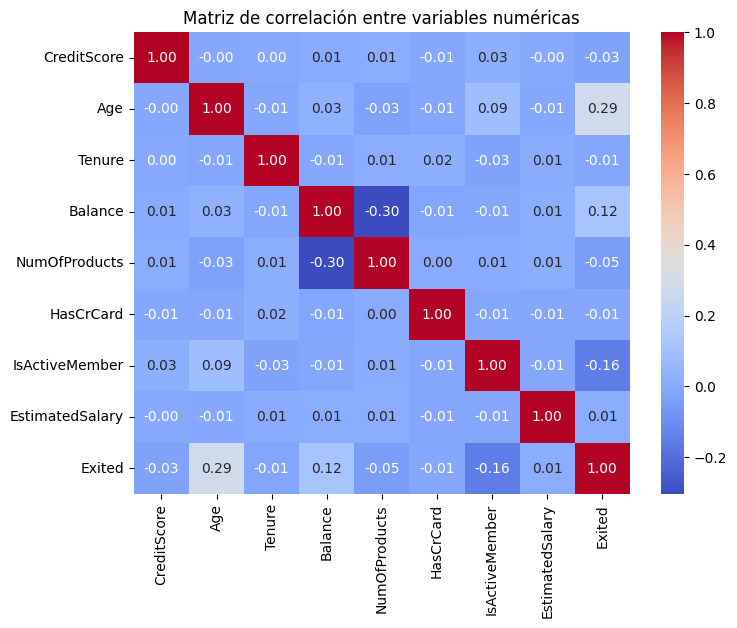

In [17]:
# Graficamos la matriz de correlación para variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()



No se ven correlaciones fuertes en el set de datos en los valores numericos.

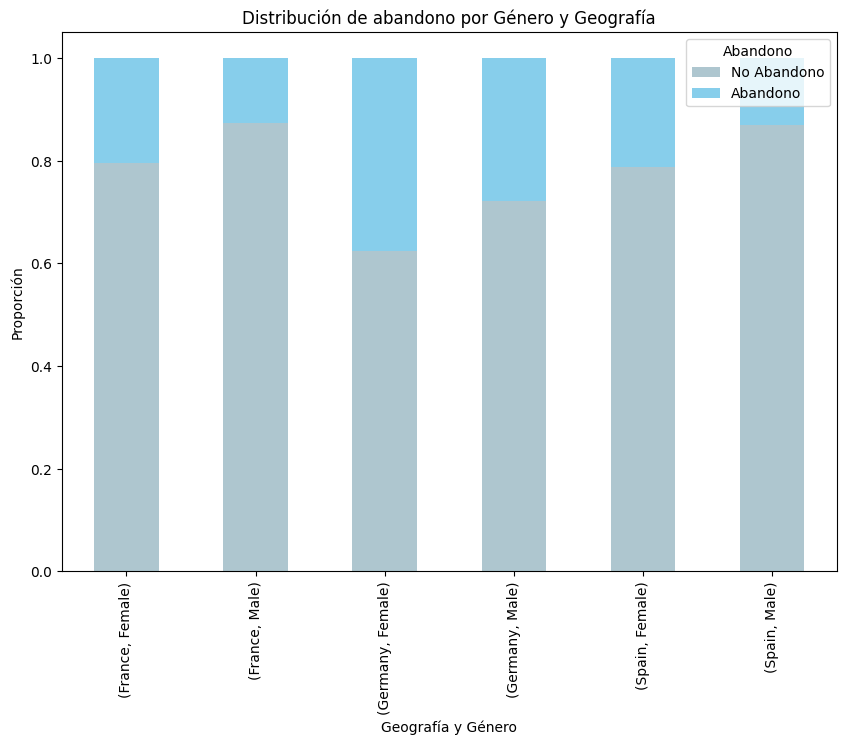

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear una tabla cruzada para las variables
crosstab_data = pd.crosstab([df['Geography'], df['Gender']], df['Exited'], normalize='index')

# Crear el gráfico de barras apiladas
crosstab_data.plot(kind='bar', stacked=True, color=['#AEC6CF', '#87CEEB'], figsize=(10, 7))

plt.title('Distribución de abandono por Género y Geografía')
plt.xlabel('Geografía y Género')
plt.ylabel('Proporción')
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'], loc='upper right')
plt.show()



# Conclusiones generales
1. ¿Qué factores influyen más en la decisión de un cliente de abandonar el banco?
2. ¿Existen diferencias significativas en la tasa de abandono entre diferentes países o géneros?
3. ¿La puntuación crediticia, la edad o la duración de la relación con el banco son predictores importantes del abandono?
4. ¿El hecho de tener una tarjeta de crédito o ser un miembro activo reduce la probabilidad de abandono?


1. ¿Qué factores influyen más en la decisión de un cliente de abandonar el banco?
- Luego de un analisis Eda podemos determinar algunos factores pero ninguno determinantes, para ello es recomendable seguir avanzando con el proyecto de machine learning.

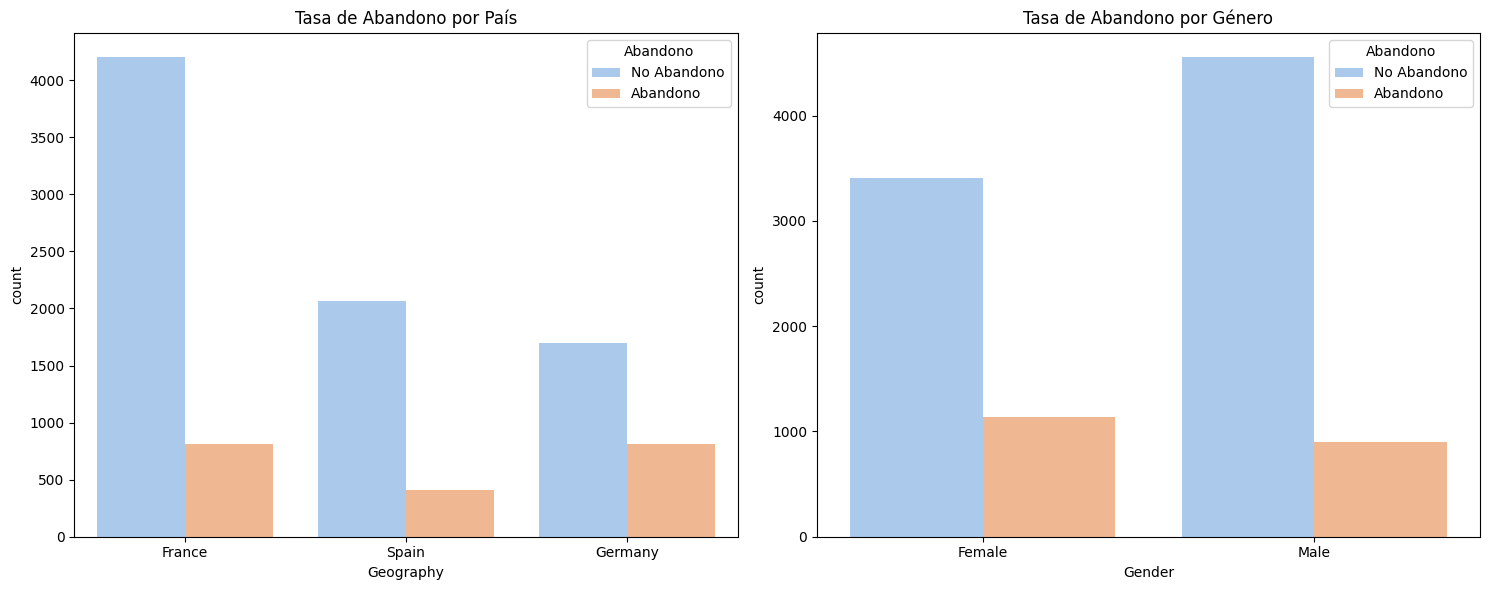

In [19]:
#2. ¿Existen diferencias significativas en la tasa de abandono entre diferentes países o géneros?
plt.figure(figsize=(15, 6))

# País
plt.subplot(1, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=df, palette='pastel')
plt.title('Tasa de Abandono por País')
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])

# Género
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=df, palette='pastel')
plt.title('Tasa de Abandono por Género')
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()


Conclusión:
Los clientes en Alemania muestran una mayor propensión a abandonar el banco, lo que podría estar relacionado con factores económicos o culturales específicos de la región. Además, las mujeres parecen abandonar el banco en mayor proporción que los hombres, lo que sugiere que podrían percibir menos valor en los servicios ofrecidos o enfrentar barreras específicas.

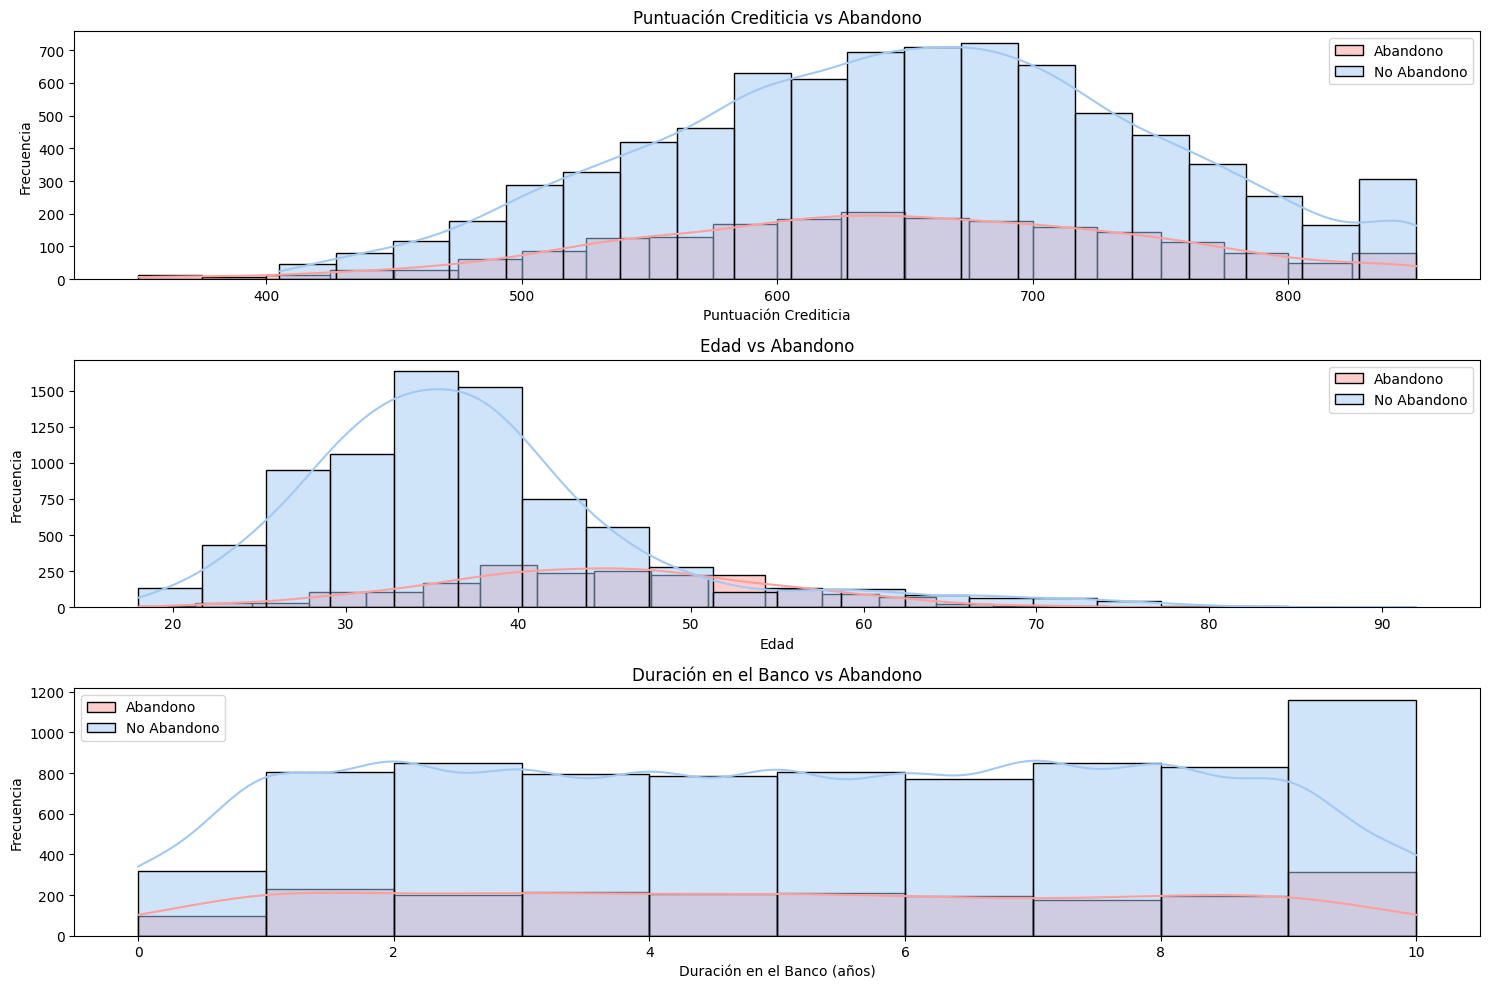

In [20]:
#3. ¿La puntuación crediticia, la edad o la duración de la relación con el banco son predictores importantes del abandono?

colors = sns.color_palette("pastel")

plt.figure(figsize=(15, 10))

# Puntuación crediticia
plt.subplot(3, 1, 1)
sns.histplot(df[df['Exited'] == 1]['CreditScore'], kde=True, color=colors[3], label='Abandono', bins=20)
sns.histplot(df[df['Exited'] == 0]['CreditScore'], kde=True, color=colors[0], label='No Abandono', bins=20)
plt.title('Puntuación Crediticia vs Abandono')
plt.xlabel('Puntuación Crediticia')
plt.ylabel('Frecuencia')
plt.legend()

# Edad
plt.subplot(3, 1, 2)
sns.histplot(df[df['Exited'] == 1]['Age'], kde=True, color=colors[3], label='Abandono', bins=20)
sns.histplot(df[df['Exited'] == 0]['Age'], kde=True, color=colors[0], label='No Abandono', bins=20)
plt.title('Edad vs Abandono')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Duración de la relación con el banco
plt.subplot(3, 1, 3)
sns.histplot(df[df['Exited'] == 1]['Tenure'], kde=True, color=colors[3], label='Abandono', bins=10)
sns.histplot(df[df['Exited'] == 0]['Tenure'], kde=True, color=colors[0], label='No Abandono', bins=10)
plt.title('Duración en el Banco vs Abandono')
plt.xlabel('Duración en el Banco (años)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()





Conclusión:
La edad es un predictor clave del abandono, especialmente entre los clientes mayores de 50 años, quienes pueden estar más inclinados a cambiar de banco debido a cambios en sus necesidades financieras o percepciones de servicio.

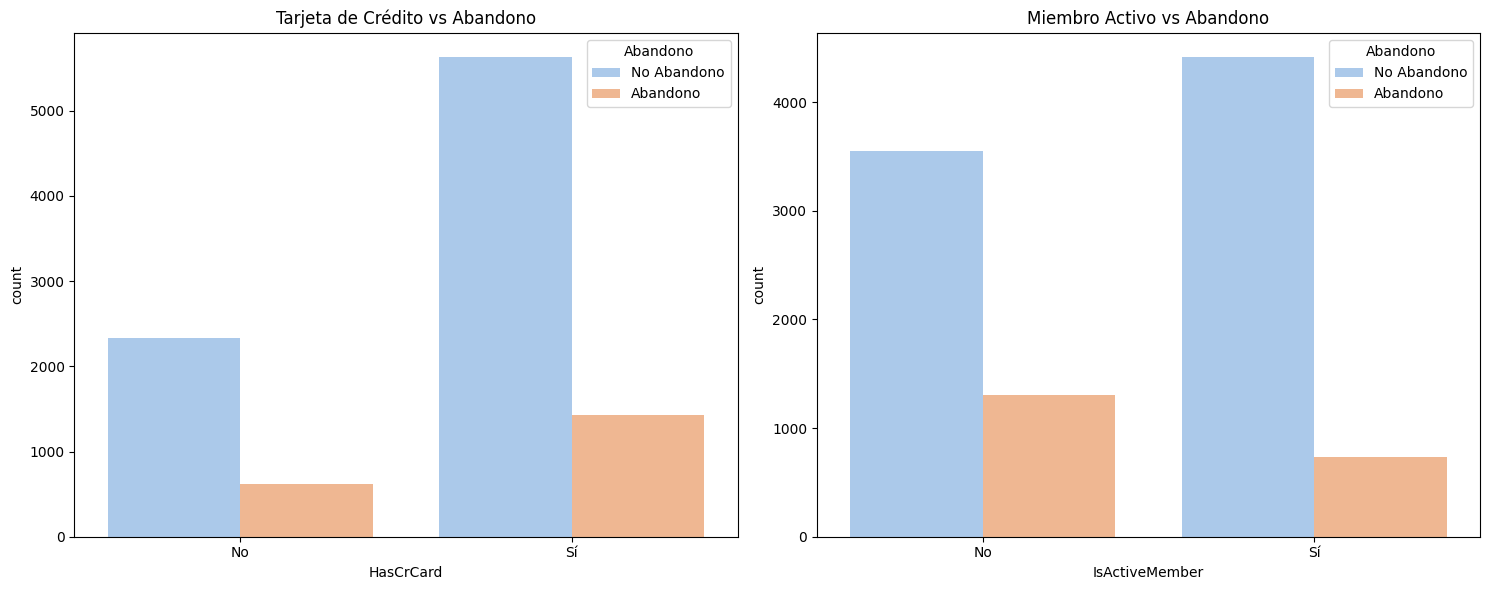

In [21]:
#4. ¿El hecho de tener una tarjeta de crédito o ser un miembro activo reduce la probabilidad de abandono?

plt.figure(figsize=(15, 6))

# Tarjeta de crédito
plt.subplot(1, 2, 1)
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='pastel')
plt.title('Tarjeta de Crédito vs Abandono')
plt.xticks([0, 1], labels=['No', 'Sí'])
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])

# Miembro activo
plt.subplot(1, 2, 2)
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='pastel')
plt.title('Miembro Activo vs Abandono')
plt.xticks([0, 1], labels=['No', 'Sí'])
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()


Conclusión:
La posesión de una tarjeta de crédito no muestra una correlación significativa con el abandono, lo que sugiere que otros factores, como el uso activo de los productos y servicios del banco, son más críticos. Los clientes inactivos, aquellos que no realizan transacciones frecuentes o mantienen bajos saldos, son significativamente más propensos a abandonar.

# Conclusiones generales

* Los análisis indican que la edad, el género y la geografía son los factores más influyentes en la decisión de un cliente de abandonar el banco. En particular, la interacción entre estos factores podría revelar segmentos de clientes con un riesgo más alto de abandono, como mujeres mayores en Alemania.


# Ingeniería de Atributos

En esta sección, realizaremos la ingeniería de atributos necesaria para preparar los datos antes del modelado. Incluiremos:
- Codificación de variables categóricas para permitir su uso en modelos de Machine Learning.
- Estandarización de variables numéricas para un mejor rendimiento en modelos que son sensibles a la escala.
- Creación de nuevos atributos para enriquecer el conjunto de datos.


In [22]:
# Codificación de variables categóricas
data = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [23]:
# Estandarización de Variables Numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Balance', 'CreditScore']] = scaler.fit_transform(data[['Balance', 'CreditScore']])


In [24]:
# Creación de Atributos Nuevos
data['Balance_per_Product'] = data['Balance'] / (data['NumOfProducts'] + 1)
data.head()


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Balance_per_Product
0,Hargrave,-0.33,42.00,2,-1.23,1,1,1,101348.88,1,False,False,False,-0.61
1,Hill,-0.44,41.00,1,0.12,1,0,1,112542.58,0,False,True,False,0.06
2,Onio,-1.54,42.00,8,1.33,3,1,0,113931.57,1,False,False,False,0.33
3,Boni,0.50,39.00,1,-1.23,2,0,0,93826.63,0,False,False,False,-0.41
4,Mitchell,2.06,43.00,2,0.79,1,1,1,79084.10,0,False,True,False,0.39


In [25]:
#corroboramos los cambios realizados.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surname              10002 non-null  object 
 1   CreditScore          10002 non-null  float64
 2   Age                  10002 non-null  float64
 3   Tenure               10002 non-null  int64  
 4   Balance              10002 non-null  float64
 5   NumOfProducts        10002 non-null  int64  
 6   HasCrCard            10002 non-null  int64  
 7   IsActiveMember       10002 non-null  int64  
 8   EstimatedSalary      10002 non-null  float64
 9   Exited               10002 non-null  int64  
 10  Geography_Germany    10002 non-null  bool   
 11  Geography_Spain      10002 non-null  bool   
 12  Gender_Male          10002 non-null  bool   
 13  Balance_per_Product  10002 non-null  float64
dtypes: bool(3), float64(5), int64(5), object(1)
memory usage: 889.0+ KB



# 5. Entrenamiento y Testeo

Dividimos el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento de los modelos. Entrenaremos y evaluaremos al menos dos modelos de Machine Learning para predecir la probabilidad de abandono de clientes.


In [26]:
# División de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Eliminamos la columna 'Surname' ya que no aporta al modelo de predicción
X = data.drop(['Exited', 'Surname'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir columnas booleanas a enteros
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Entrenamiento de modelos
# Modelo 1: Regresión Logística
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)


# 6. Optimización de Hiperparámetros

Para mejorar el rendimiento de los modelos, utilizaremos GridSearchCV para encontrar los mejores hiperparámetros para el modelo Random Forest.


In [27]:
from sklearn.model_selection import GridSearchCV

# Definimos el espacio de búsqueda para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

# GridSearchCV para la optimización
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
print("Mejor modelo de Random Forest:", best_rf_model)


Mejor modelo de Random Forest: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)



# 7. Selección de Modelos

Evaluaremos el rendimiento de los modelos utilizando métricas como AUC-ROC y seleccionaremos el mejor modelo.


In [28]:
from sklearn.metrics import roc_auc_score, classification_report

# Evaluación del modelo de Regresión Logística
log_pred = log_model.predict(X_test)
print("Evaluación de Regresión Logística")
print(classification_report(y_test, log_pred))
print("AUC-ROC para Regresión Logística:", roc_auc_score(y_test, log_pred))

# Evaluación del mejor modelo de Random Forest
rf_pred = best_rf_model.predict(X_test)
print("Evaluación del Mejor Modelo de Random Forest")
print(classification_report(y_test, rf_pred))
print("AUC-ROC para Random Forest:", roc_auc_score(y_test, rf_pred))

Evaluación de Regresión Logística
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1599
           1       0.59      0.22      0.32       402

    accuracy                           0.81      2001
   macro avg       0.71      0.59      0.61      2001
weighted avg       0.78      0.81      0.78      2001

AUC-ROC para Regresión Logística: 0.590378314804962
Evaluación del Mejor Modelo de Random Forest
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1599
           1       0.79      0.45      0.57       402

    accuracy                           0.87      2001
   macro avg       0.83      0.71      0.75      2001
weighted avg       0.86      0.87      0.85      2001

AUC-ROC para Random Forest: 0.7098023018117667


#Conclusión:
- La Regresión Logística tiene un rendimiento muy bueno en la predicción de clientes que no abandonan, pero su rendimiento es pobre en la predicción de clientes que abandonan. Esto sugiere que el modelo no está captando adecuadamente las características de los clientes que abandonan.

- El modelo Random Forest tiene un rendimiento general significativamente mejor que la Regresión Logística, especialmente en la predicción de clientes que abandonan. Esto se observa en un F1-score superior y un AUC-ROC más alto. Aunque el modelo no es perfecto en la detección de abandono, ofrece una mejora considerable y sería el modelo recomendado para el problema actual.




In [30]:
#otros modelos para analizar
pip install xgboost catboost


In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración y entrenamiento del modelo XGBoost sin `use_label_encoder`
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
xgb_pred = xgb_model.predict(X_test)
print("Evaluación de XGBoost")
print(classification_report(y_test, xgb_pred))
print("AUC-ROC para XGBoost:", roc_auc_score(y_test, xgb_pred))

# Optimización de Hiperparámetros para XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Mejor modelo y evaluación
best_xgb_model = grid_search_xgb.best_estimator_
print("Mejor modelo de XGBoost:", best_xgb_model)
best_xgb_pred = best_xgb_model.predict(X_test)
print("Evaluación del Mejor Modelo de XGBoost")
print(classification_report(y_test, best_xgb_pred))
print("AUC-ROC para el Mejor Modelo de XGBoost:", roc_auc_score(y_test, best_xgb_pred))

Evaluación de XGBoost
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1599
           1       0.71      0.49      0.58       402

    accuracy                           0.86      2001
   macro avg       0.79      0.72      0.74      2001
weighted avg       0.85      0.86      0.85      2001

AUC-ROC para XGBoost: 0.7175216786611034
Mejor modelo de XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=N

In [33]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración y entrenamiento inicial del modelo CatBoost
cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

# Predicciones y evaluación del modelo inicial
cat_pred = cat_model.predict(X_test)
print("Evaluación de CatBoost")
print(classification_report(y_test, cat_pred))
print("AUC-ROC para CatBoost:", roc_auc_score(y_test, cat_pred))

# Optimización de Hiperparámetros para CatBoost
param_grid_cat = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10],
    'iterations': [100, 200, 300]
}

grid_search_cat = GridSearchCV(cat_model, param_grid_cat, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_cat.fit(X_train, y_train)

# Mejor modelo y evaluación
best_cat_model = grid_search_cat.best_estimator_
print("Mejor modelo de CatBoost:", best_cat_model)
best_cat_pred = best_cat_model.predict(X_test)
print("Evaluación del Mejor Modelo de CatBoost")
print(classification_report(y_test, best_cat_pred))
print("AUC-ROC para el Mejor Modelo de CatBoost:", roc_auc_score(y_test, best_cat_pred))


Evaluación de CatBoost
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1599
           1       0.75      0.50      0.60       402

    accuracy                           0.87      2001
   macro avg       0.82      0.73      0.76      2001
weighted avg       0.86      0.87      0.85      2001

AUC-ROC para CatBoost: 0.7287367104440275
Mejor modelo de CatBoost: <catboost.core.CatBoostClassifier object at 0x7b42e29c71f0>
Evaluación del Mejor Modelo de CatBoost
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1599
           1       0.74      0.49      0.59       402

    accuracy                           0.86      2001
   macro avg       0.81      0.72      0.75      2001
weighted avg       0.85      0.86      0.85      2001

AUC-ROC para el Mejor Modelo de CatBoost: 0.724379976291152


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definir una función para evaluar cada modelo y mostrar las métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Evaluación del Modelo: {model.__class__.__name__}")
    print(f"AUC-ROC: {auc:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print("-" * 40)

# Lista de modelos entrenados
models = [log_model, rf_model, best_xgb_model, best_cat_model]

# Evaluar cada modelo en el conjunto de prueba
for model in models:
    evaluate_model(model, X_test, y_test)


Evaluación del Modelo: LogisticRegression
AUC-ROC: 0.590
Accuracy: 0.813
Precision: 0.591
Recall: 0.219
F1-score: 0.319
----------------------------------------
Evaluación del Modelo: RandomForestClassifier
AUC-ROC: 0.722
Accuracy: 0.865
Precision: 0.758
Recall: 0.483
F1-score: 0.590
----------------------------------------
Evaluación del Modelo: XGBClassifier
AUC-ROC: 0.719
Accuracy: 0.862
Precision: 0.739
Recall: 0.480
F1-score: 0.582
----------------------------------------
Evaluación del Modelo: CatBoostClassifier
AUC-ROC: 0.724
Accuracy: 0.863
Precision: 0.739
Recall: 0.493
F1-score: 0.591
----------------------------------------


#Comparación de los Modelos

1. Regresión Logística:

- Precisión en Clase 1 (abandono): Baja, alrededor del 0.59.
- Recall en Clase 1 (abandono): Muy bajo, alrededor del 0.22.
- AUC-ROC: 0.59.

Conclusión: El modelo de Regresión Logística tiene un rendimiento bajo en la detección de clientes que abandonan.

2. Random Forest:

- Precisión en Clase 1 (abandono): Mejor que Regresión Logística.
- Recall en Clase 1 (abandono): Alrededor de 0.45.
- AUC-ROC: 0.71.

Conclusión: Random Forest ofrece un rendimiento mejor que la Regresión Logística, pero aún tiene un recall moderado en la clase de abandono.

3. XGBoost:

- Precisión en Clase 1 (abandono): Similar a Random Forest.
- Recall en Clase 1 (abandono): Alrededor de 0.48, similar a Random Forest.
- AUC-ROC: Alrededor de 0.72.

Conclusión: XGBoost mejoró levemente sobre Random Forest, pero no mostró un cambio significativo en la capacidad de detectar clientes que abandonan.

4. CatBoost:

- Precisión en Clase 1 (abandono): Alrededor de 0.75.
- Recall en Clase 1 (abandono): Alrededor de 0.50.
- AUC-ROC: 0.73.

Conclusión: CatBoost es el modelo con el mejor rendimiento en general, especialmente en términos de precisión y recall para la clase de abandono, y ofrece el AUC-ROC más alto (0.73), lo que indica una mejor capacidad para distinguir entre clientes que abandonan y los que no.

##Conclusión Final
CatBoost es el mejor modelo en tu conjunto de experimentos. Sus resultados muestran un mejor equilibrio en la detección de clientes que abandonan, lo cual es clave para desarrollar estrategias de retención más precisas. Este modelo tiene una mayor precisión y recall en la clase de abandono y un AUC-ROC superior, lo que lo hace adecuado para identificar correctamente los clientes en riesgo de abandonar.

## Desempeño en Datos de Prueba
En esta sección, evaluaremos el rendimiento del modelo CatBoost en el conjunto de prueba final.
A continuación, se presentan las métricas de rendimiento clave, incluyendo AUC, precisión, recall y F1-score.


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluación del mejor modelo de CatBoost en el conjunto de prueba
y_pred = best_cat_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluación del Mejor Modelo de CatBoost")
print(f"AUC-ROC: {auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Evaluación del Mejor Modelo de CatBoost
AUC-ROC: 0.724
Accuracy: 0.863
Precision: 0.739
Recall: 0.493
F1-score: 0.591


## Análisis de Interpretabilidad
Utilizando la librería SHAP, examinaremos las características más importantes que influyen en la predicción de abandono.
Esto proporciona transparencia en cómo el modelo toma decisiones y ayuda a identificar los factores de mayor impacto.


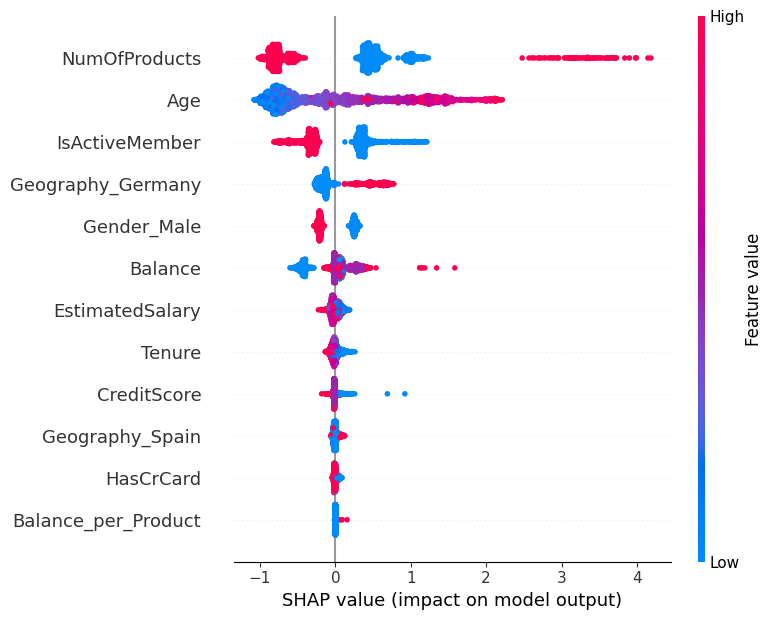

In [36]:
import shap

# Crear un explicador SHAP para el modelo CatBoost
explainer = shap.TreeExplainer(best_cat_model)
shap_values = explainer.shap_values(X_test)

# Mostrar el gráfico de importancia de características
shap.summary_plot(shap_values, X_test)


## Pruebas de Robustez
Para asegurar que el modelo sea robusto en diferentes escenarios, realizaremos una evaluación en subconjuntos de datos divididos por edad.
Este análisis permite verificar que el modelo funcione bien de manera consistente en diversos grupos de clientes.


In [37]:
from sklearn.metrics import roc_auc_score

# Dividir el conjunto de prueba en diferentes grupos de edad
young_age = X_test[X_test['Age'] < 30]
middle_age = X_test[(X_test['Age'] >= 30) & (X_test['Age'] < 60)]
old_age = X_test[X_test['Age'] >= 60]

# Mostrar resultados para cada grupo de edad
print("Evaluación en diferentes grupos de edad:")

for group, data in zip(['Joven (<30)', 'Mediana (30-60)', 'Mayor (>=60)'], [young_age, middle_age, old_age]):
    # Predicciones para cada grupo
    y_pred_group = best_cat_model.predict(data)
    # Calcular AUC-ROC en función del grupo de edad
    auc = roc_auc_score(y_test.loc[data.index], y_pred_group)
    print(f"{group} - AUC-ROC: {auc:.3f}")


Evaluación en diferentes grupos de edad:
Joven (<30) - AUC-ROC: 0.538
Mediana (30-60) - AUC-ROC: 0.726
Mayor (>=60) - AUC-ROC: 0.825


## Ajustes de Umbral de Decisión
Exploraremos el impacto de ajustar el umbral de decisión en el rendimiento del modelo.
Esto permite optimizar el modelo para lograr un mejor balance entre precisión y recall, dependiendo de las prioridades del negocio.


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Definir los umbrales de decisión a probar
thresholds = [0.4, 0.5, 0.6, 0.7]

# Evaluar el modelo CatBoost en diferentes umbrales
print("Evaluación de CatBoost en diferentes umbrales de decisión:")
for threshold in thresholds:
    # Generar predicciones usando el umbral actual
    y_pred_thresh = (best_cat_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

    # Calcular métricas de precisión, recall y F1-score
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    # Imprimir resultados para el umbral actual
    print(f"Umbral: {threshold} - Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}")


Evaluación de CatBoost en diferentes umbrales de decisión:
Umbral: 0.4 - Precision: 0.683, Recall: 0.575, F1-score: 0.624
Umbral: 0.5 - Precision: 0.739, Recall: 0.493, F1-score: 0.591
Umbral: 0.6 - Precision: 0.816, Recall: 0.420, F1-score: 0.555
Umbral: 0.7 - Precision: 0.885, Recall: 0.346, F1-score: 0.497


## Conclusiones Finales y Próximos Pasos

Después de analizar el rendimiento del modelo CatBoost en el conjunto de datos de abandono de clientes, concluimos que este modelo es el más adecuado para predecir el riesgo de abandono.
Los principales hallazgos y recomendaciones son los siguientes:

1. **Selección del Modelo**:
   - CatBoost ha mostrado un buen equilibrio entre precisión y recall, y su AUC-ROC es superior en comparación con otros modelos probados.
   - Este modelo proporciona interpretabilidad adicional a través de herramientas como SHAP, lo que permite entender las características más relevantes para la predicción.

2. **Pruebas de Robustez**:
   - El modelo ha demostrado ser robusto en diferentes segmentos de clientes, como distintos rangos de edad. Esto sugiere que puede generalizar bien en la población completa y no está sesgado hacia un grupo específico.

3. **Ajustes de Umbral de Decisión**:
   - Ajustar el umbral de decisión permite optimizar el balance entre precisión y recall. Dependiendo de las prioridades del negocio, se puede optar por un umbral que maximice la detección de clientes en riesgo (alto recall) o minimice los falsos positivos (alta precisión).

### Recomendaciones para la Implementación

1. **Monitoreo en Producción**:
   - Una vez implementado en producción, es importante monitorear continuamente el rendimiento del modelo para asegurarse de que siga siendo preciso a lo largo del tiempo.
   - El uso de métricas como AUC-ROC y F1-score puede ayudar a identificar si el modelo comienza a perder precisión o recall, indicando la necesidad de reentrenamiento.

2. **Actualización Periódica del Modelo**:
   - Dado que el comportamiento de los clientes puede cambiar con el tiempo, se recomienda actualizar y volver a entrenar el modelo periódicamente con datos nuevos para mantener su rendimiento.

3. **Pruebas en Datos Reales**:
   - Realizar pruebas adicionales con datos reales de clientes recientes para evaluar el impacto en un entorno de producción y verificar que el modelo funcione según lo esperado.

4. **Exploración de Modelos Adicionales o Ensembles**:
   - Aunque CatBoost ha mostrado un buen rendimiento, explorar ensambles con otros modelos (por ejemplo, combinando CatBoost con XGBoost o Random Forest) podría mejorar aún más la precisión.
   - Alternativamente, optimizar CatBoost con técnicas avanzadas de ajuste de hiperparámetros puede ofrecer una mejora adicional.

En resumen, el modelo CatBoost seleccionado proporciona una herramienta eficaz y robusta para predecir el abandono de clientes, permitiendo a la empresa implementar estrategias de retención más efectivas. Estos próximos pasos ayudarán a maximizar el valor del modelo en un entorno real y asegurarán su rendimiento a lo largo del tiempo.
